In [3]:
#Uploading zip file
from google.colab import files
uploaded = files.upload()

Saving seg_train.zip to seg_train.zip


**Importing Images and cleaning the data**

In [0]:
#Importing Packages
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [0]:
#Unzipping images
!unzip seg_train.zip

In [69]:
#Importing all images of buildings, appending them, and removing none values
Buildings = []
for i in range(1,20055):
    Buildings.append(cv.imread("seg_train/buildings/" + str(i) + ".jpg"))

Buildings = np.array(Buildings) 
Buildings2 = [x for x in Buildings if x is not None]
print("Before taking out None values:", len(Buildings))
print("After taking out None values:",len(Buildings2))

Before taking out None values: 20054
After taking out None values: 2190


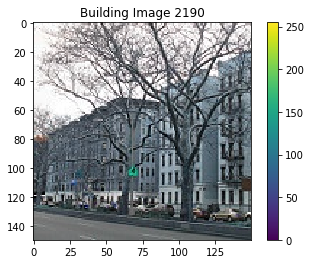

In [82]:
#Plotting a picture of a building
plt.figure()
plt.imshow(Buildings2[2189])
plt.colorbar()
plt.grid(False)
plt.title('Building Image 2190')
plt.show()

In [71]:
#Creating a Label for each of the building images
Buildings_Labels = np.repeat(0,2190)
print(len(Buildings_Labels))
print(Buildings_Labels)

2190
[0 0 0 ... 0 0 0]


In [0]:
#Same process as buildings but for forests
Forests = []
for i in range(1,20051):
    Forests.append(cv.imread("seg_train/forest/" + str(i) + ".jpg"))
    
Forests = np.array(Forests) 
Forests2 = [x for x in Forests if x is not None]

In [14]:
len(Forests2)

2270

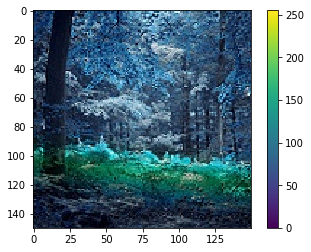

In [15]:
plt.figure()
plt.imshow(Forests2[2269])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
Forests_Labels = np.repeat(1,2270)
len(Forests_Labels)

2270

In [0]:
#Same process as buildings but for glaciers
Glaciers = []
for i in range(1,20046):
    Glaciers.append(cv.imread("seg_train/glacier/" + str(i) + ".jpg"))
    
Glaciers = np.array(Glaciers) 
Glaciers2 = [x for x in Glaciers if x is not None]

In [18]:
len(Glaciers2)

2403

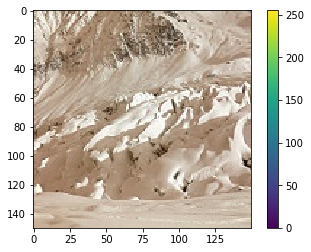

In [19]:
plt.figure()
plt.imshow(Glaciers2[2402])
plt.colorbar()
plt.grid(False)
plt.show()

In [20]:
Glaciers_Labels = np.repeat(2,2403)
len(Glaciers_Labels)

2403

In [21]:
#Same process as buildings but for mountains
Mountains = []
for i in range(1,20052):
    Mountains.append(cv.imread("seg_train/mountain/" + str(i) + ".jpg"))
    
Mountains = np.array(Mountains) 
Mountains2 = [x for x in Mountains if x is not None]
len(Mountains2)

2511

In [22]:
Mountains_Labels = np.repeat(3,2511)
len(Mountains_Labels)

2511

In [23]:
#Same process as buildings but for seas
Seas = []
for i in range(1,20053):
    Seas.append(cv.imread("seg_train/sea/" + str(i) + ".jpg"))
    
Seas = np.array(Seas) 
Seas2 = [x for x in Seas if x is not None]
len(Seas2)

2273

In [24]:
Seas_Labels = np.repeat(4,2273)
len(Seas_Labels)

2273

In [25]:
#Same process as buildings but for streets
Streets = []
for i in range(1,20044):
    Streets.append(cv.imread("seg_train/street/" + str(i) + ".jpg"))
    
Streets = np.array(Streets) 
Streets2 = [x for x in Streets if x is not None]
len(Streets2)

2381

In [26]:
Streets_Labels = np.repeat(5,2381)
len(Streets_Labels)

2381

In [0]:
#Combining all the images into one array
Images = np.concatenate([Buildings2,Forests2,Glaciers2,Mountains2,Seas2,Streets2])

In [28]:
len(Images)

14028

In [0]:
#Combining all the labels into one array
Labels = np.concatenate([Buildings_Labels,Forests_Labels,Glaciers_Labels,Mountains_Labels,Seas_Labels,Streets_Labels])

In [30]:
len(Labels)

14028

In [0]:
#Defining what are labels stand for
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [0]:
class_names = ['buildings','forest','glacier','mountain','sea','street']

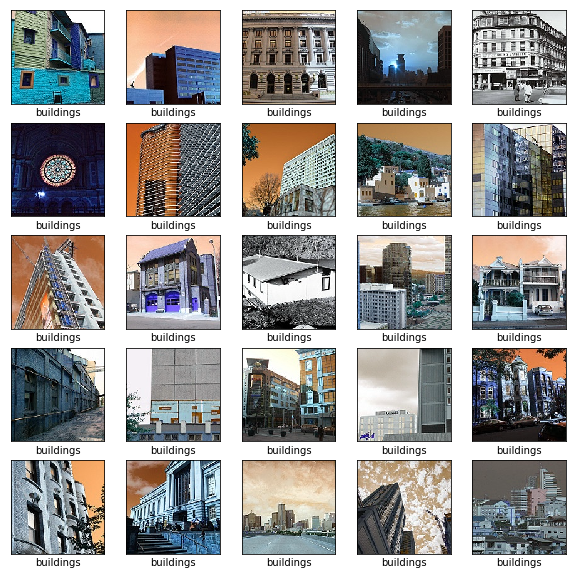

In [33]:
#Plotting the first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Labels[i]])
plt.show()

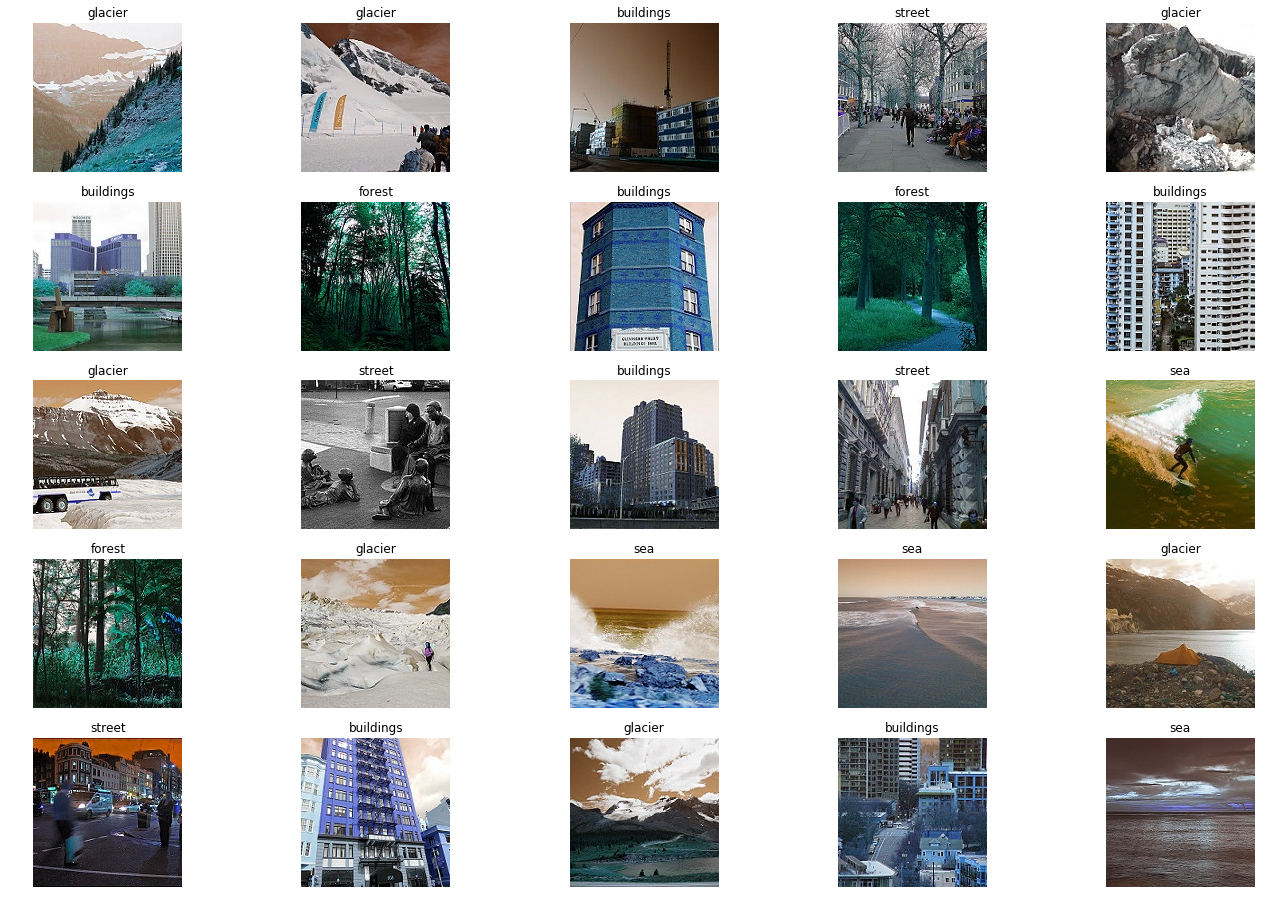

In [34]:
#Plotting a random subset of our images
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [35]:
#Installing Tensor Flow 2.0
!pip install tensorflow==2.0.0-alpha0

     |████████████████████████████████| 79.9MB 287kB/s 
     |████████████████████████████████| 3.0MB 30.0MB/s 
     |████████████████████████████████| 61kB 25.2MB/s 
     |████████████████████████████████| 419kB 44.3MB/s 
  Found existing installation: tensorflow 1.13.1
    Uninstalling tensorflow-1.13.1:
      Successfully uninstalled tensorflow-1.13.1


In [78]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


In [0]:
Images = np.array(Images) 
Labels = np.array(Labels)

In [38]:
#Our images need to be resized in their array form in order to be used by our models
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14028,)
Shape of Labels: (14028,)


In [39]:
type(Images)

numpy.ndarray

In [0]:
#Resizing all our images
Images2 = []
for i in range(0,14028):
  image = cv.resize(Images[i],(150,150))
  Images2.append(image)

In [0]:
Images3 = np.array(Images2)

In [42]:
#Suitable size
Images3.shape

(14028, 150, 150, 3)

**Model Attempt 1**

In [0]:
#First atttempt at layering
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Flattening our matrices
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 73984)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [0]:
#Optimization Parameters
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
#Training our model with a validation split
trained = model.fit(Images3,Labels,epochs=10,validation_split=0.30)

Train on 9819 samples, validate on 4209 samples
Epoch 1/10
9819/9819 [==============================] - 344s 35ms/sample - loss: 1.3712 - accuracy: 0.4887 - val_loss: 10.3954 - val_accuracy: 0.0000e+00
Epoch 2/10
9819/9819 [==============================] - 340s 35ms/sample - loss: 1.0404 - accuracy: 0.5956 - val_loss: 4.4952 - val_accuracy: 4.7517e-04
Epoch 3/10
9819/9819 [==============================] - 337s 34ms/sample - loss: 0.8028 - accuracy: 0.6851 - val_loss: 12.6121 - val_accuracy: 0.0024
Epoch 4/10
9819/9819 [==============================] - 333s 34ms/sample - loss: 0.6560 - accuracy: 0.7500 - val_loss: 23.5258 - val_accuracy: 0.0033
Epoch 5/10
9819/9819 [==============================] - 335s 34ms/sample - loss: 0.5077 - accuracy: 0.8058 - val_loss: 33.5615 - val_accuracy: 0.0081
Epoch 6/10
9819/9819 [==============================] - 334s 34ms/sample - loss: 0.4297 - accuracy: 0.8403 - val_loss: 38.7314 - val_accuracy: 0.0140
Epoch 7/10
9819/9819 [=======================

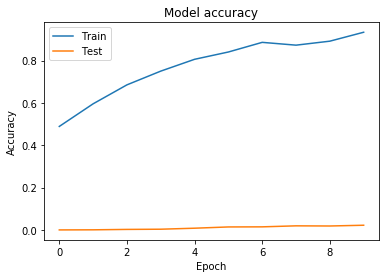

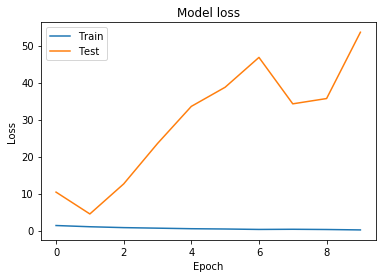

In [68]:
#Plotting our model's accuracy and loss for the train and validation set
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Model Attempt 2**

In [0]:
#Maybe let's try shuffling our data
from sklearn.utils import shuffle
Images4 = shuffle(Images3,random_state=42)
Labels2 = shuffle(Labels, random_state=42)

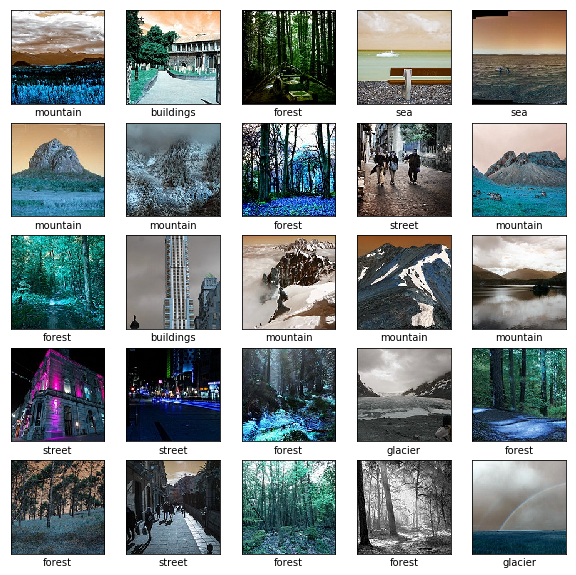

In [75]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Images4[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Labels2[i]])
plt.show()

In [79]:
model2 = models.Sequential()
model2.add(layers.Conv2D(200, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model2.add(layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPooling2D((5, 5)))
model2.add(layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model2.add(layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model2.add(layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model2.add(layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(5,5))

model2.add(layers.Flatten())
model2.add(layers.Dense(180, activation='relu'))
model2.add(layers.Dense(100,activation='relu'))
model2.add(layers.Dense(50,activation='relu'))
model2.add(layers.Dropout(rate=0.5))
model2.add(layers.Dense(6, activation='softmax'))

model2.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 21, 21, 50)       

In [80]:
trained2 = model.fit(Images4,Labels2,epochs=3,validation_split=0.30)

Train on 9819 samples, validate on 4209 samples
Epoch 1/3
9819/9819 [==============================] - 349s 36ms/sample - loss: 1.8334 - accuracy: 0.3467 - val_loss: 1.2476 - val_accuracy: 0.4680
Epoch 2/3
9819/9819 [==============================] - 342s 35ms/sample - loss: 1.1640 - accuracy: 0.5188 - val_loss: 1.3327 - val_accuracy: 0.4875
Epoch 3/3
9819/9819 [==============================] - 343s 35ms/sample - loss: 0.9190 - accuracy: 0.6275 - val_loss: 1.2853 - val_accuracy: 0.5429


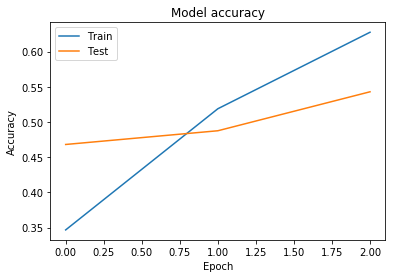

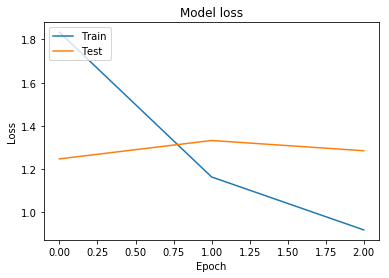

In [81]:
plt.plot(trained2.history['accuracy'])
plt.plot(trained2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(trained2.history['loss'])
plt.plot(trained2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()